In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [15]:
classes = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_0_1_2', 'class_3_4']

dataframes = {}
for class_name in classes:
    file_path = 'Models/' + class_name + '/model/log.txt'
    train_df = pd.read_csv(file_path, header=None, 
                     names=['epoch', 'step', 'time','train_perp','valid_perp','train_acc','valid_acc'])
    for column in train_df.columns:
        train_df[column] = train_df[column].str.split(':').str[1].astype(float)

    test_path = 'Models/' + class_name + '/model/BakerLab_test_log.txt'
    test_df = pd.read_csv(test_path, header=None, 
                     names=['epoch', 'test_perp', 'test_acc'])
    test_df = test_df.groupby('epoch').last().reset_index()
    for column in test_df.columns:
        test_df[column] = test_df[column].str.split(':').str[1].astype(float)

    dataframes[class_name] = pd.merge(train_df, test_df, on=['epoch'], how='left')

    


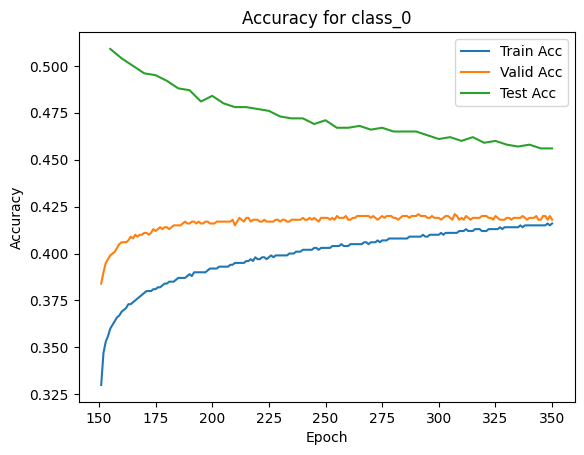

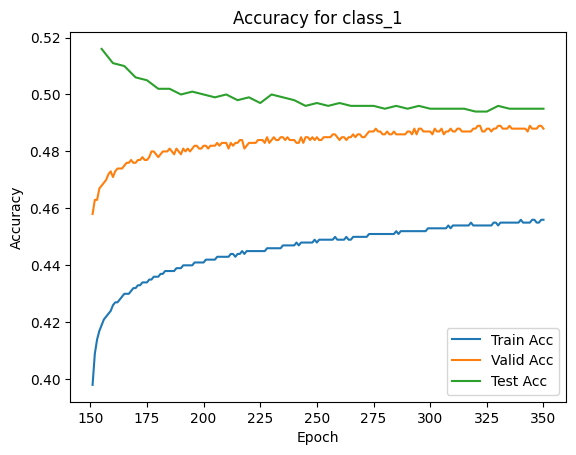

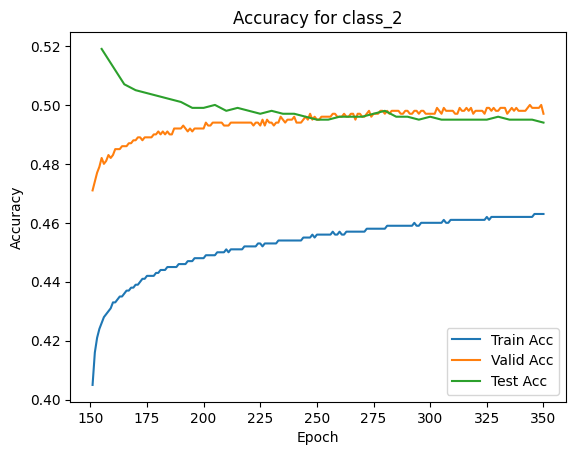

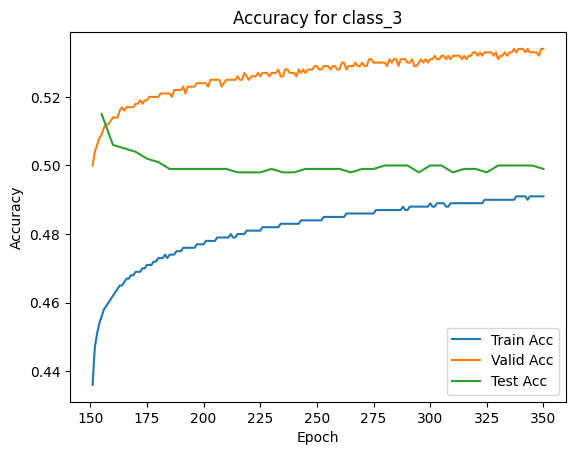

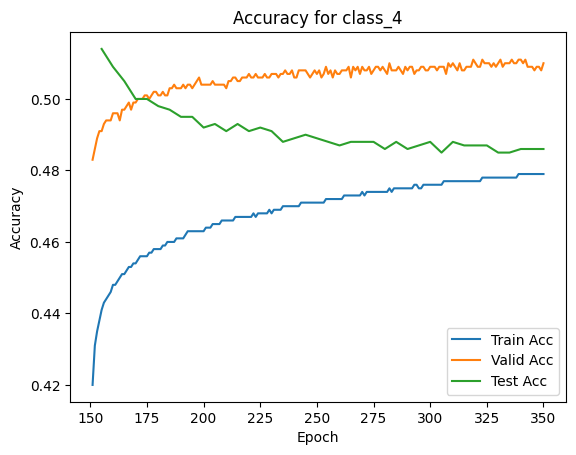

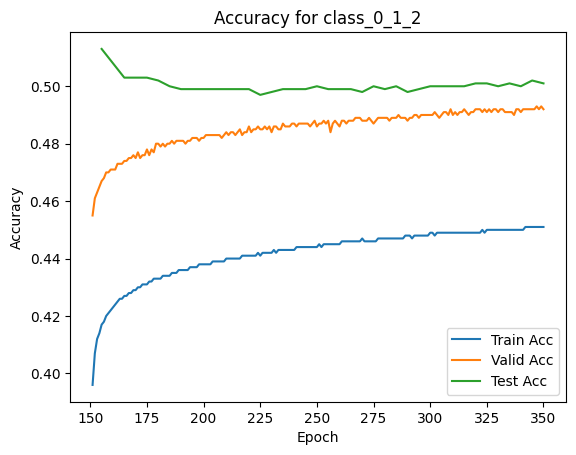

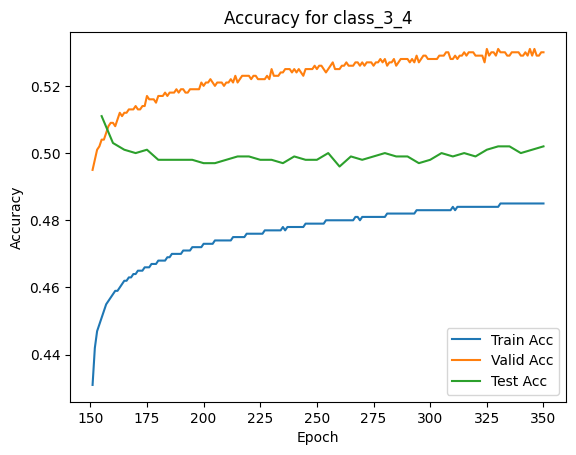

In [21]:
for class_name, df in dataframes.items():
    plt.figure()
    plt.plot(df['epoch'], df['train_acc'], label='Train Acc')
    plt.plot(df['epoch'], df['valid_acc'], label='Valid Acc')
    plt.plot(df.dropna()['epoch'], df.dropna()['test_acc'], label='Test Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy for {class_name}')
    plt.legend()
    plt.show()
